In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers

In [4]:
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [7]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [8]:
# c. Define the network architecture using Keras
model = keras.Sequential([
    keras.Input(shape=(784,)),              # input layer
    layers.Dense(256, activation="relu"),   # hidden layer 1
    layers.Dense(128, activation="relu"),   # hidden layer 2
    layers.Dense(10, activation="softmax")  # output layer (10 classes)
])

In [9]:
# d. Compile & Train the model using SGD
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=2
)

Epoch 1/10
469/469 - 9s - 18ms/step - accuracy: 0.8711 - loss: 0.4568 - val_accuracy: 0.9309 - val_loss: 0.2379
Epoch 2/10
469/469 - 10s - 21ms/step - accuracy: 0.9414 - loss: 0.2041 - val_accuracy: 0.9502 - val_loss: 0.1632
Epoch 3/10
469/469 - 9s - 20ms/step - accuracy: 0.9566 - loss: 0.1525 - val_accuracy: 0.9607 - val_loss: 0.1349
Epoch 4/10
469/469 - 10s - 22ms/step - accuracy: 0.9657 - loss: 0.1210 - val_accuracy: 0.9626 - val_loss: 0.1225
Epoch 5/10
469/469 - 10s - 22ms/step - accuracy: 0.9715 - loss: 0.0992 - val_accuracy: 0.9697 - val_loss: 0.1030
Epoch 6/10
469/469 - 10s - 22ms/step - accuracy: 0.9767 - loss: 0.0826 - val_accuracy: 0.9689 - val_loss: 0.0998
Epoch 7/10
469/469 - 6s - 12ms/step - accuracy: 0.9797 - loss: 0.0708 - val_accuracy: 0.9719 - val_loss: 0.0865
Epoch 8/10
469/469 - 10s - 22ms/step - accuracy: 0.9826 - loss: 0.0613 - val_accuracy: 0.9728 - val_loss: 0.0834
Epoch 9/10
469/469 - 11s - 23ms/step - accuracy: 0.9851 - loss: 0.0534 - val_accuracy: 0.9753 - val

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

In [12]:
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.9766
Test loss: 0.0762


In [13]:
# f. Plot the training loss and accuracy
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

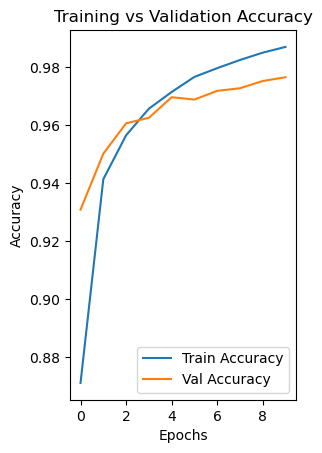

In [14]:
# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

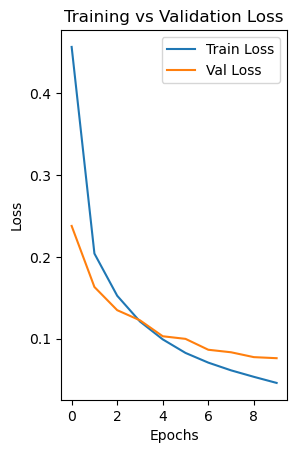

In [15]:
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

In [16]:
plt.show()